In [1]:
function [X, Y, n] = syntheticWMTLR(t, m, d, p, s, alpha, alpha_w, fpath)
%     d = 1 % dimensionality
%     m = 100 % instances per task
%     t = 5 % number of tasks
    
    n = 0 % total number of instances (calculated )
    %alpha=1000 % max magnitude for tasks' features
    %alpha_w=100 % magnitude for the weightss
    
    % polarity for the features
    if p == 1 % enforce
        polarity = randn(d, 1);
        polarity = sign(polarity);
        pfunc = @(W) abs(W) .* polarity;
    else % random
        pfunc = @(W) (W); 
    endif
    
    % magnitude
    if s == 1 
        % integers features
        magnitudeFunc = @() randi(alpha) ;
        xgen = @() randi([-5,5], m, d); 
        dataset_type = 'sparse'
    else
        % real features
        magnitudeFunc = @() rand() * alpha ;
        xgen = @() randn(m, d) * alpha ; 
        dataset_type = 'continuous'
    endif
    
    % data generation
    for i=1:t
        X{i} = xgen() + magnitudeFunc();
        
        % weight noise
        w_polarity_noise = rand(d,1); 
        w_polarity_noise(w_polarity_noise > 0.1) = 1;
        w_polarity_noise(w_polarity_noise <= 0.1) = -1;
        W{i} = pfunc(randn(d,1)*alpha_w) .* w_polarity_noise;        
                    
        noise{i} = randn(m, 1)*0.1;
        Y{i} = X{i} * W{i} + noise{i};
        n = n + m;
    end
    
    
    % save data
    num_tasks = t;
    num_features = d;
    num_instances = n;
    
    save(
        '-V7', 
        fpath, 
        'X', 
        'Y',
        'W',
        'noise',
        'num_tasks', 
        'num_features',
        'num_instances',
        'dataset_type'
    );
end

In [4]:
%t=5; m=200; d=1; p=1; s=0;
%t=5; m=100; d=1; p=0; s=1;
%t=5; m=100; d=1; p=0; s=0; alpha=10, alpha_w=10;
%t=20; m=100; d=25; p=0; s=0;
t=20; m=1000; d=1000; p=0; s=0; alpha=1, alpha_w=1000;
fpath = '../data/syntheticWMTLR7';
fpath = [fpath 't' num2str(t) ];
fpath = [fpath 'm' num2str(m) ];
fpath = [fpath 'd' num2str(d) ];
fpath = [fpath 'p' num2str(p) ];
fpath = [fpath 's' num2str(s) ];
fpath = [fpath '.mat' ]
[X, Y] = syntheticWMTLR(t, m, d, p, s, alpha, alpha_w, fpath);

alpha =  1
fpath = ../data/syntheticWMTLR7t20m1000d1000p0s0.mat
n = 0
dataset_type = continuous


In [17]:
clear;
load ../data/syntheticWMTLR7t20m100d25p1s0.mat
t=num_tasks
whos


t =  20
Variables in the current scope:

   Attr Name               Size                     Bytes  Class
   ==== ====               ====                     =====  ===== 
        W                  1x20                      4000  cell
        X                  1x20                    400000  cell
        Y                  1x20                     16000  cell
        dataset_type       1x10                        10  char
        noise              1x20                     16000  cell
        num_features       1x1                          8  double
        num_instances      1x1                          8  double
        num_tasks          1x1                          8  double
        t                  1x1                          8  double

Total is 94 elements using 436042 bytes



In [18]:
W{2}

ans =

     63.809
   -685.262
   -790.223
   -810.645
    -92.641
  -1469.583
    648.954
  -1714.998
  -1035.872
   1029.120
   -175.050
   -864.415
   -842.740
  -1981.585
   1275.949
   -833.724
   1688.512
    963.747
   -502.781
    585.864
   -415.636
   1534.282
    218.594
   -507.977
    712.534



In [19]:
w=cell2mat(W);
w(:,2)

ans =

     63.809
   -685.262
   -790.223
   -810.645
    -92.641
  -1469.583
    648.954
  -1714.998
  -1035.872
   1029.120
   -175.050
   -864.415
   -842.740
  -1981.585
   1275.949
   -833.724
   1688.512
    963.747
   -502.781
    585.864
   -415.636
   1534.282
    218.594
   -507.977
    712.534



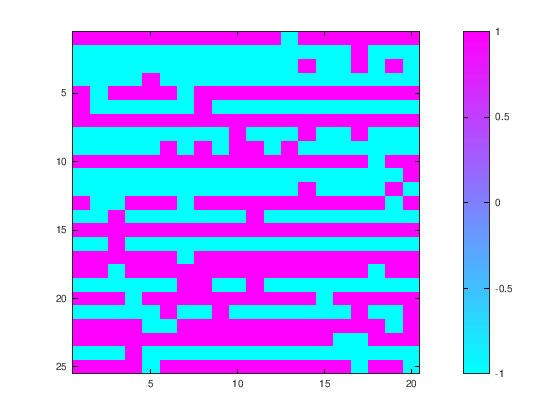

In [20]:
%cmap = colormap ();
colormap('cool');
ws = sign(w);
imagesc (ws);
colorbar ();
#imshow(W)

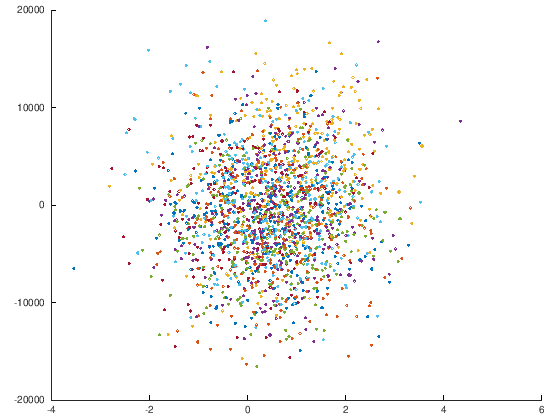

In [21]:
for i=1:t
    scatter(X{i}(:,1), Y{i})
    hold on
end